          Date  Value
100 2023-04-11    NaN
101 2023-04-12    NaN
102 2023-04-13    NaN
103 2023-04-14    NaN
104 2023-04-15    NaN
..         ...    ...
196 2023-07-16    NaN
197 2023-07-17    NaN
198 2023-07-18    NaN
199 2023-07-19    NaN
200 2023-07-20    NaN

[101 rows x 2 columns]


          Date  Value  Value_arima
100 2023-04-11    NaN    -0.103568
101 2023-04-12    NaN    -0.095798
102 2023-04-13    NaN    -0.083315
103 2023-04-14    NaN    -0.072096
104 2023-04-15    NaN    -0.088166
..         ...    ...          ...
196 2023-07-16    NaN    -0.028432
197 2023-07-17    NaN    -0.027399
198 2023-07-18    NaN    -0.022167
199 2023-07-19    NaN    -0.018896
200 2023-07-20    NaN    -0.025205

[101 rows x 3 columns]




c:\ProgramData\Anaconda3\envs\AI\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\Anaconda3\envs\AI\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\ProgramData\Anaconda3\envs\AI\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


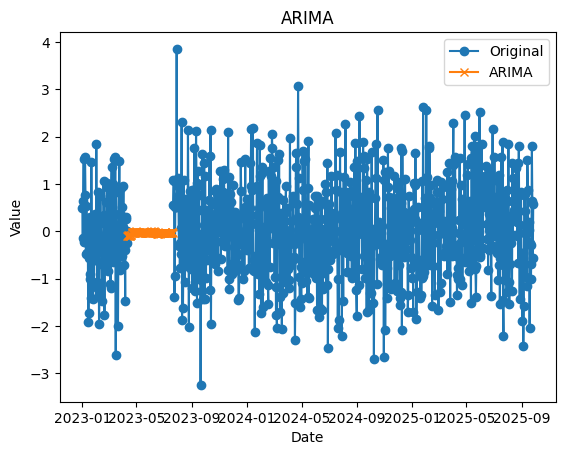

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

dates = pd.date_range(start = '2023-01-01', periods = 1000, freq = 'D')
np.random.seed(42)
values = np.random.randn(1000)

data = pd.DataFrame({'Date': dates, 'Value': values})

data.loc[100:200, 'Value'] = np.nan
print(data.loc[100:200])
print('\n')

model = ARIMA(data['Value'].dropna(), order = (1, 1, 1))
model_fit = model.fit()

predicted_values = model_fit.predict(start = 100, end = 2000)

data.loc[100:200, 'Value_arima'] = predicted_values
print(data.loc[100:200])
print('\n')

plt.plot(data['Date'], data['Value'], 'o-', label = 'Original')
plt.plot(data['Date'], data['Value_arima'], 'x-', label = 'ARIMA')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA')
plt.legend()
plt.show()